In [185]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [186]:
data = pd.read_csv("data/stackoverflow_full.csv")

In [187]:
data

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [188]:
data = data.drop(columns=['Unnamed: 0'])


In [189]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values by imputing with mean
data.fillna(data.mean(), inplace=True)


Missing Values:
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


C:\Users\Rj\AppData\Local\Temp\ipykernel_27680\1265254351.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [190]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country'])


In [191]:
# Fill missing values in 'HaveWorkedWith' column
data['HaveWorkedWith'].fillna("", inplace=True)

# Create a new feature representing the total number of programming languages worked with
data['TotalLanguagesWorkedWith'] = data['HaveWorkedWith'].apply(lambda x: len(x.split(';')) if x != "" else 0)


In [192]:
# Identify and remove outliers in numerical features (using z-score method)
from scipy import stats

z_scores = stats.zscore(data[['YearsCode', 'YearsCodePro', 'PreviousSalary']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [193]:
# Check for and remove duplicate rows
data.drop_duplicates(inplace=True)


In [194]:
data

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TotalLanguagesWorkedWith
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,4
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,12
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,7
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,13
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,13
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,11
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,12
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,15


In [195]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71798 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       71798 non-null  object 
 1   Accessibility             71798 non-null  object 
 2   EdLevel                   71798 non-null  object 
 3   Employment                71798 non-null  int64  
 4   Gender                    71798 non-null  object 
 5   MentalHealth              71798 non-null  object 
 6   MainBranch                71798 non-null  object 
 7   YearsCode                 71798 non-null  int64  
 8   YearsCodePro              71798 non-null  int64  
 9   Country                   71798 non-null  object 
 10  PreviousSalary            71798 non-null  float64
 11  HaveWorkedWith            71798 non-null  object 
 12  ComputerSkills            71798 non-null  int64  
 13  Employed                  71798 non-null

In [196]:
data.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,TotalLanguagesWorkedWith
count,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000
mean,0.885442,13.648890,8.533803,66403.791888,13.477994,0.538344,13.477994
std,0.318489,8.604917,6.968214,48405.462309,7.039559,0.498531,7.039559
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28308.000000,8.000000,0.000000,8.000000
50%,1.000000,11.000000,6.000000,56498.000000,13.000000,1.000000,13.000000
75%,1.000000,19.000000,12.000000,93701.000000,17.000000,1.000000,17.000000
max,1.000000,42.000000,32.000000,216200.000000,107.000000,1.000000,107.000000


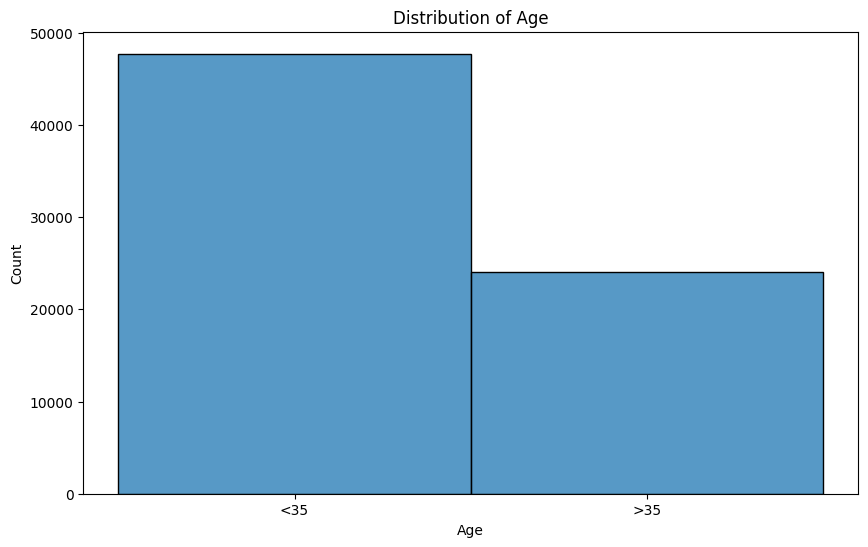

In [197]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

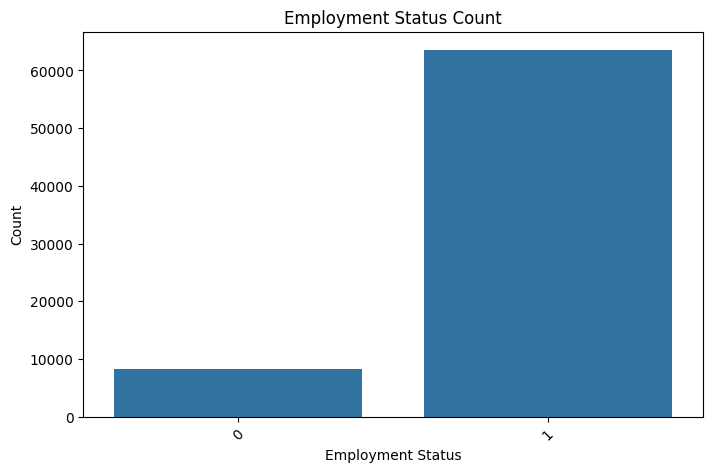

In [198]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Employment')
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Rj\AppData\Local\Temp\ipykernel_27680\571606977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


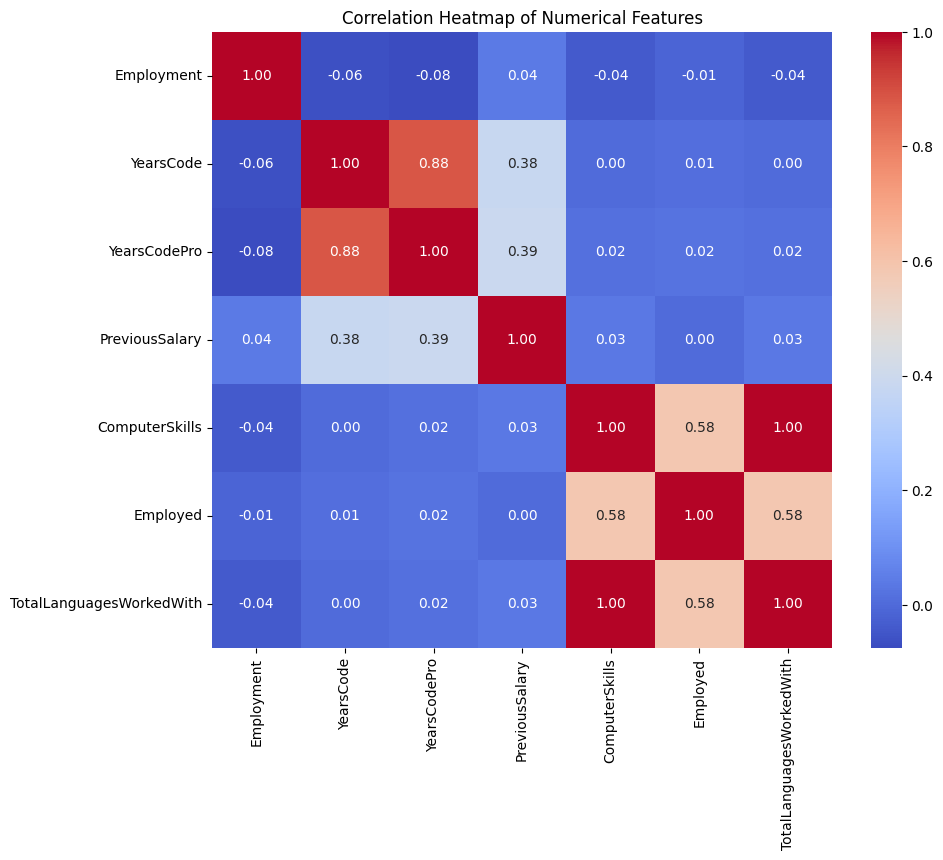

In [199]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [200]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71798 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       71798 non-null  object 
 1   Accessibility             71798 non-null  object 
 2   EdLevel                   71798 non-null  object 
 3   Employment                71798 non-null  int64  
 4   Gender                    71798 non-null  object 
 5   MentalHealth              71798 non-null  object 
 6   MainBranch                71798 non-null  object 
 7   YearsCode                 71798 non-null  int64  
 8   YearsCodePro              71798 non-null  int64  
 9   Country                   71798 non-null  object 
 10  PreviousSalary            71798 non-null  float64
 11  HaveWorkedWith            71798 non-null  object 
 12  ComputerSkills            71798 non-null  int64  
 13  Employed                  71798 non-null  int64  
 14  TotalL

In [201]:
final_df = data.drop(columns=["Accessibility",'MentalHealth',"Country","ComputerSkills",'HaveWorkedWith','Gender'])

In [202]:
final_df.to_csv("data.csv")

In [160]:
final_df

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith,Cluster
0,<35,Master,1,Dev,7,4,51552.0,0,4,1
1,<35,Undergraduate,1,Dev,12,5,46482.0,1,12,1
2,<35,Master,1,Dev,15,6,77290.0,0,7,1
3,<35,Undergraduate,1,Dev,9,6,46135.0,0,13,1
4,>35,PhD,0,NotDev,40,30,160932.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
73457,<35,Undergraduate,1,Dev,7,2,41058.0,1,13,1
73458,>35,Undergraduate,1,Dev,21,16,115000.0,1,11,0
73459,<35,Undergraduate,1,Dev,4,3,57720.0,1,12,1
73460,<35,Undergraduate,1,Dev,5,1,70000.0,1,15,1


In [129]:
final_df.isnull().sum()

Age                         0
EdLevel                     0
Employment                  0
MainBranch                  0
YearsCode                   0
YearsCodePro                0
PreviousSalary              0
Employed                    0
TotalLanguagesWorkedWith    0
dtype: int64

In [131]:
features = final_df.columns
features

Index(['Age', 'EdLevel', 'Employment', 'MainBranch', 'YearsCode',
       'YearsCodePro', 'PreviousSalary', 'Employed',
       'TotalLanguagesWorkedWith'],
      dtype='object')

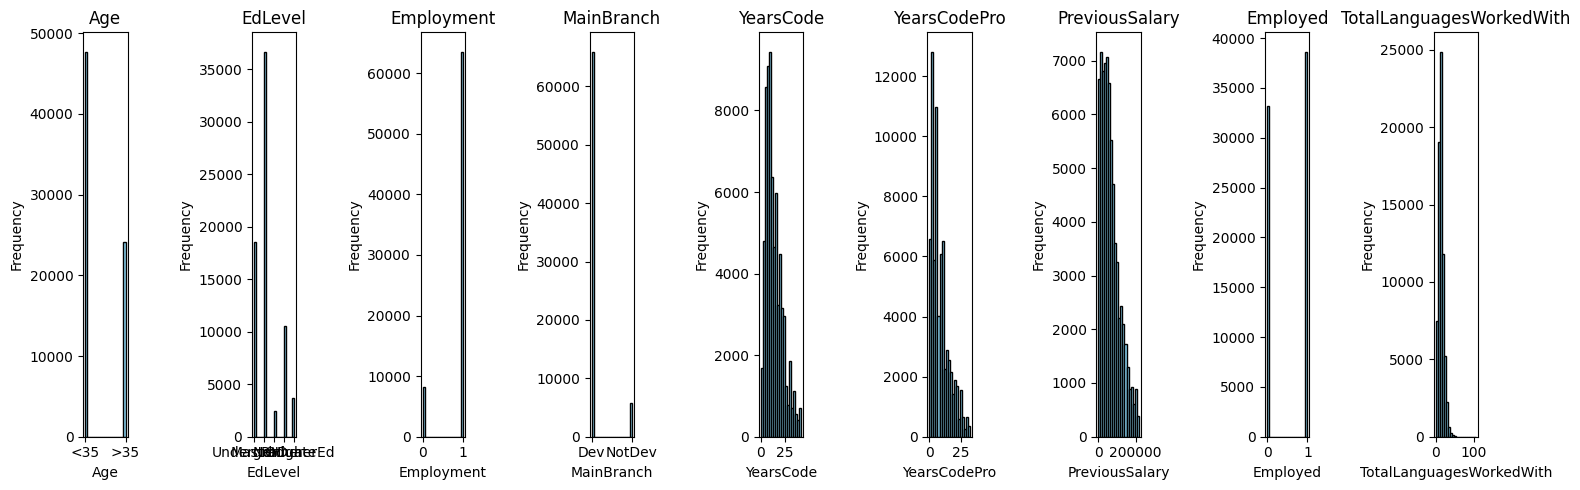

In [132]:
import matplotlib.pyplot as plt

# Select features for visualization

# Plot histograms for selected features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


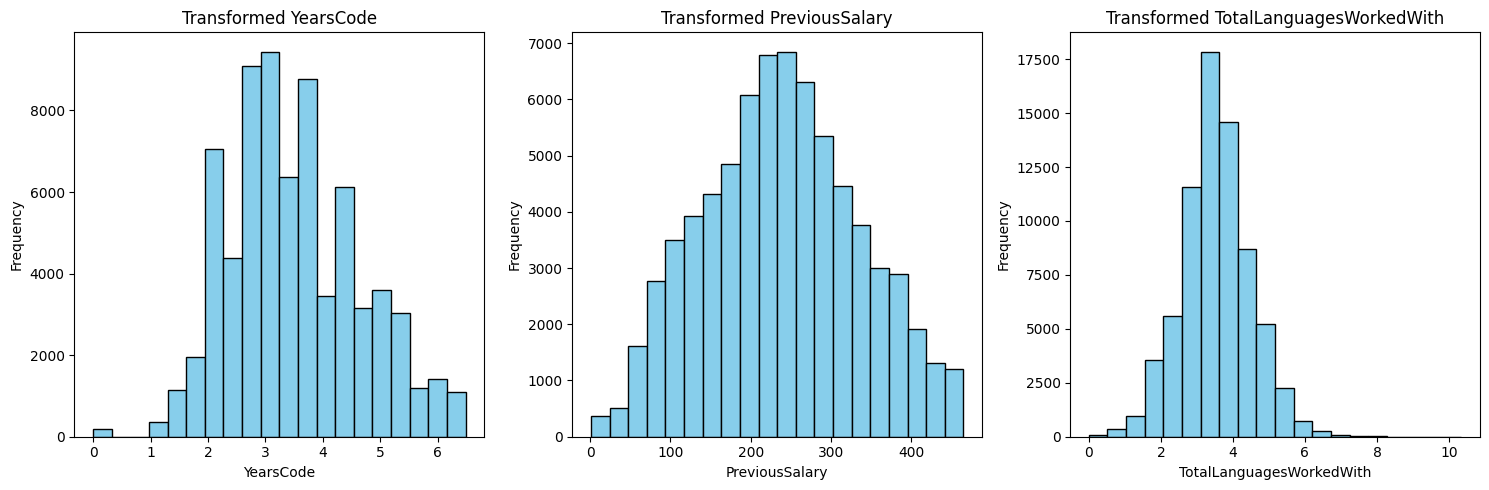

In [133]:
import numpy as np
from scipy.stats import boxcox

# Select features to transform (assuming 'YearsCode' and 'PreviousSalary' are skewed)
skewed_features = ['YearsCode', 'PreviousSalary','TotalLanguagesWorkedWith']

for feature in skewed_features:
    data[feature] = np.sqrt(data[feature])

# Visualize the distribution of transformed features
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i, feature in enumerate(skewed_features, 1):
    plt.subplot(1, len(skewed_features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Transformed {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [138]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['EdLevel','Age','MainBranch'])
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(final_df)

In [139]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

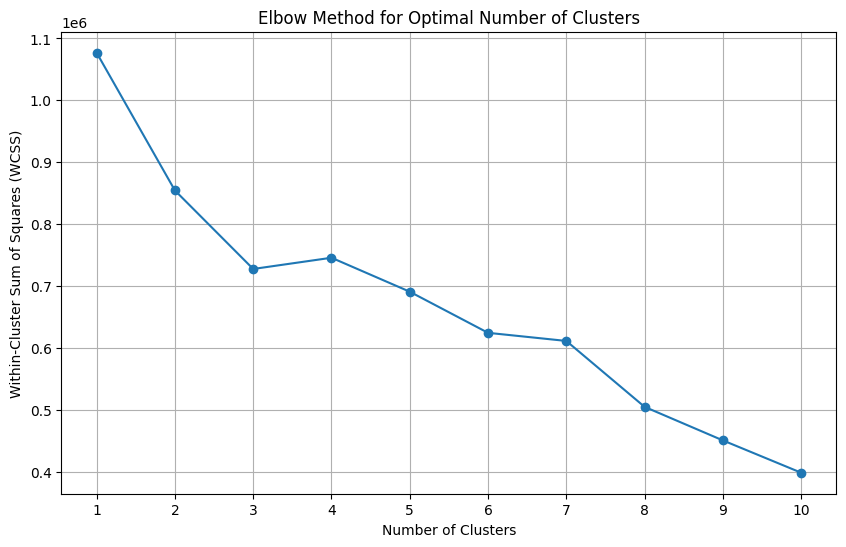

In [140]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature selection and preprocessing
# Assuming X_scaled is your preprocessed and scaled feature matrix

# Initialize empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define the range of clusters to test
k_range = range(1, 11)

# Calculate WCSS for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


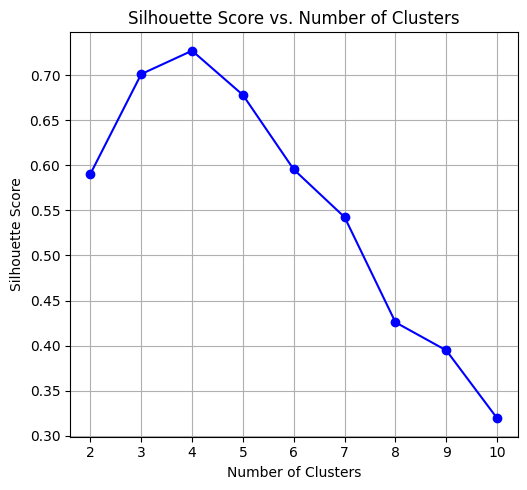

In [141]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data for demonstration purposes
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42)

# Define the range of clusters to test
k_range = range(2, 11)

# Initialize empty lists to store evaluation metrics
silhouette_scores = []

# Iterate over different number of clusters
for k in k_range:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Predict cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, labels))
   

# Plot evaluation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)


plt.tight_layout()
plt.show()


In [142]:
n_clusters = 3

In [143]:
kmeans_model = KMeans(n_clusters=n_clusters,init='k-means++' ,random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [148]:
final_df['Cluster'] = kmeans_model.labels_


In [149]:
cluster_centers = kmeans_model.cluster_centers_
feature_names = final_df.columns
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} Characteristics:")
    for feature, value in zip(feature_names, center):
        print(f"   {feature}: {value}")

Cluster 1 Characteristics:
   Age: 0.10583223032954367
   EdLevel: -0.041863900585532444
   Employment: 0.06937357677660827
   MainBranch: 0.08729222684096075
   YearsCode: -0.15519013923247543
   YearsCodePro: -1.4058262117945188
   PreviousSalary: 1.4058262117945188
   Employed: 0.29802990717591193
   TotalLanguagesWorkedWith: -0.29802990717591193
   Cluster: -0.09576700001116556
Cluster 2 Characteristics:
   Age: -0.06410793908339121
   EdLevel: 0.02193000744946141
   Employment: -0.03136822310364881
   MainBranch: -0.11555741086524257
   YearsCode: 0.11088945091466033
   YearsCodePro: 0.6985613799036026
   PreviousSalary: -0.6985613799036026
   Employed: 0.2980299071759366
   TotalLanguagesWorkedWith: -0.2980299071759366
   Cluster: 0.04862088131088754
Cluster 3 Characteristics:
   Age: 0.10968989881024814
   EdLevel: -0.01713405006431483
   Employment: -0.009680086869798838
   MainBranch: 0.5704043234509999
   YearsCode: -0.2901164979699231
   YearsCodePro: -0.2854327651270635
   

In [150]:
final_df

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith,Cluster
0,<35,Master,1,Dev,7,4,51552.0,0,4,1
1,<35,Undergraduate,1,Dev,12,5,46482.0,1,12,1
2,<35,Master,1,Dev,15,6,77290.0,0,7,1
3,<35,Undergraduate,1,Dev,9,6,46135.0,0,13,1
4,>35,PhD,0,NotDev,40,30,160932.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
73457,<35,Undergraduate,1,Dev,7,2,41058.0,1,13,1
73458,>35,Undergraduate,1,Dev,21,16,115000.0,1,11,0
73459,<35,Undergraduate,1,Dev,4,3,57720.0,1,12,1
73460,<35,Undergraduate,1,Dev,5,1,70000.0,1,15,1


### Highly Desirable Candidates Cluster: 
This cluster represents candidates who are likely highly desirable and hirable. They have significant professional coding experience (YearsCodePro), high previous salaries, and are employed. Employers may find them valuable due to their extensive experience and skills.

### Promising Candidates Cluster: 
Candidates in this cluster show promise and potential for employment. They have some coding experience but may be in the earlier stages of their careers, reflected in their lower previous salaries and fewer years of professional coding experience compared to Cluster 1. However, they are still employed and have the opportunity to grow and develop their skills further.

### Skillful but Unemployed Candidates Cluster: 
This cluster consists of candidates who possess diverse skill sets (TotalLanguagesWorkedWith) but are currently unemployed. Despite their skills and experience, they may face challenges in finding employment opportunities. Employers may consider exploring this pool of talent for potential hires.

In [208]:
def decode_cluster_labels(labels):
    decoded_labels = []
    for label in labels:
        if label == 0:
            decoded_labels.append("Highly Desirable Candidates Cluster")
        elif label == 1:
            decoded_labels.append("Promising Candidates Cluster")
        elif label == 2:
            decoded_labels.append("Skillful but Unemployed Candidates Cluster")
        # Add more conditions if you have additional clusters
        # elif label == 3:
        #     decoded_labels.append("Cluster 4")
        # Add more conditions as needed
        else:
            decoded_labels.append("Unknown Cluster")
    return decoded_labels

In [203]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Sample new data
new_data_point = {
    'Age': [0.0693057801908994, -0.5893706423726275, 1.2367969619134387],
    'EdLevel': [-0.04033395165578037, 0.10264139325035161, -0.17287221492488447],
    'Employment': [0.07929209364604535, 0.0917782348578657, -0.3281226963198331],
    'MainBranch': [0.17037210043529727, -0.1835025414047827, 0.1612319177842294],
    'YearsCode': [-0.16127959505636902, 0.4728628122077367, -0.8333254623102991],
    'YearsCodePro': [-1.4062209094855216, 0.6837547837990632, 0.5597313998459154],
    'PreviousSalary': [1.4062209094855216, -0.6837547837990632, -0.5597313998459154],
    'Employed': [-0.02870330276754416, 0.2980299071759202, -0.6349595207659441],
    'TotalLanguagesWorkedWith': [0.028703302767544202, -0.2980299071759202, 0.6349595207659442]
}


new_data = pd.DataFrame(new_data_point)

new_data.shape

(3, 9)

In [204]:
data_encoded = preprocessor.fit_transform(new_data)

In [205]:
data_encoded.shape

(3, 15)

In [209]:

# Predict cluster labels for the new data
new_data_cluster_labels = kmeans_model.predict(data_encoded)

new_data_decoded_labels = decode_cluster_labels(new_data_cluster_labels)
new_data['Cluster_Label'] = new_data_decoded_labels


In [210]:
new_data

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith,Cluster,Cluster_Label
0,0.069306,-0.040334,0.079292,0.170372,-0.161280,-1.406221,1.406221,-0.028703,0.028703,1,Promising Candidates Cluster
1,-0.589371,0.102641,0.091778,-0.183503,0.472863,0.683755,-0.683755,0.298030,-0.298030,0,Highly Desirable Candidates Cluster
2,1.236797,-0.172872,-0.328123,0.161232,-0.833325,0.559731,-0.559731,-0.634960,0.634960,1,Promising Candidates Cluster
